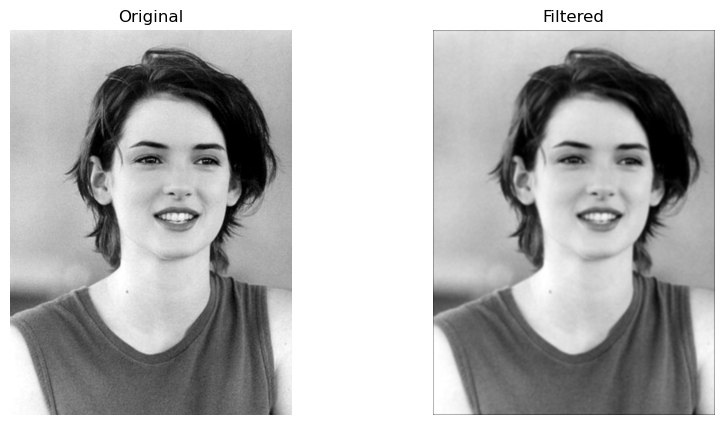

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Steps 2~9 (25 points)
# Enter your code here.
kernel_size = 5
inputs = tf.keras.Input(shape=(None,None,1))
outputs = Conv2D(1, kernel_size=kernel_size, strides=1,padding='same',name='conv1')(inputs)
filter_net = tf.keras.Model(inputs, outputs)
filter_net.get_layer('conv1').set_weights([np.ones((kernel_size, kernel_size, 1, 1))/np.array([kernel_size**2]),np.array([0])])
img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)
# print(img.shape)
img_batch = np.expand_dims(img, axis=0).astype(np.float32)
# print(img_batch.shape)
img_out = filter_net(img_batch)
# print(img_out.shape)
img_out = np.squeeze(img_out.numpy(), axis=(0,-1)).astype(np.uint8)
# print(img_out.shape)

# display img and img_out
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_out, cmap='gray')
plt.title('Filtered')
plt.axis('off')
plt.show()



#[Question 1 (5 points)] If kernel_size in Steps 3 and 5 is changed from 5 to 11,
# how will img_out change (more blurry or more clear)? Why?

### Question 1 Answer:
img_out 會變得更模糊，由程式碼可以得知此 filter 是 box filter，此類 filter 將每個 pixel 都一視同仁， 單純把以 $kernel\_size$ 為大小的 window 所涵蓋的範圍內取平均並輸出，這樣會過濾掉圖片中的高頻資訊（也就是細節紋理...等），使圖像平滑化以及變得模糊，因此當 $kernel\_size$ 越大，平滑的效果會越明顯，也就會越模糊。

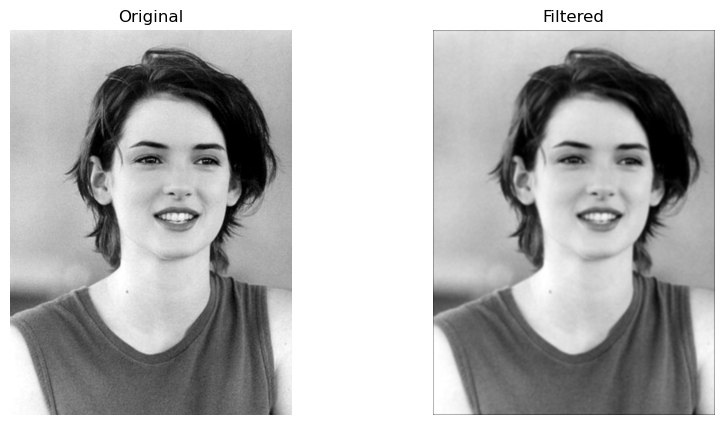

In [2]:
# Steps 10~13 (15 points)
# Enter your code here.
pad = int((kernel_size - 1) / 2)
img_pad = np.zeros((img.shape[0] + 2 * pad, img.shape[1] + 2 * pad))
img_pad[pad:-pad, pad:-pad] = img

inputs_pad = tf.keras.Input(shape=(None, None, 1))
outputs_pad = Conv2D(1, kernel_size, strides=1, padding='valid',name='conv1')(inputs_pad)
filter_net_pad = tf.keras.Model(inputs=inputs_pad, outputs=outputs_pad)
filter_net_pad.get_layer('conv1').set_weights([np.ones([kernel_size, kernel_size, 1, 1])/np.array([kernel_size**2]), np.array([0])])

img_batch = np.expand_dims(img_pad, axis=0).astype(np.float32)
# print(img_batch.shape)
img_out_pad = filter_net_pad(img_batch)
# print(img_out_pad.shape)
img_out_pad = np.squeeze(img_out_pad.numpy(), axis=(0,-1)).astype(np.uint8)
# print(img_out_pad.shape)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_out_pad, cmap='gray')
plt.title('Filtered')
plt.axis('off')
plt.show()


# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, and Step 10 to Step 13 be denoted as Method 2. 
# Why Methods 1 and 2 lead to the same results?

### Question 2 Answer:
- Method 1 使用的是 padding = 'same' , 由套件來先對輸入影像填補 0, 以至於輸出跟原來影像同樣大小。
- Method 2 我們先自己手動對原輸入影像填補 0, 因此即便使用 padding = 'valid' , 卷積核也是在同樣的區域上做卷積。

兩種方法都是是先對影像做填補 0 的動作，只是一個是手動填補，另一個是由套件幫我們完成，接著再做相同的卷積，自然模型輸出都會一樣。